<a href="https://colab.research.google.com/github/DaJaCruz/PhD/blob/main/ANN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Created on 25/03/2023 

@author: D. Cruz, INEGI
"""

In [1]:
# Import Packages
import matplotlib.pyplot as plt # import plotting tools to create figures
from matplotlib import cm # to change colors of surface plots
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd # Pandas dataframe (very common in ML)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_regression
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
from matplotlib.lines import Line2D
from keras.models import load_model
import requests
from io import BytesIO
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import save_model

In [2]:
# Basic plotting tools needed in Python.
#
#
# Uncomment line below if you want to enable live rotation of the surface plots.
#%matplotlib notebook
#
# Set the color scheme used in every plot:
#set_cm = cm.inferno # viridis, inferno, copper, PuBu, cool, coolwarm, hsv
#
#%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
#plt.style.use("seaborn") # style for plotting that comes from seaborn
FS = 26  # Font Size
plt.rcParams['axes.facecolor'] = (0.97, 0.97, 0.97)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = FS
params = {"ytick.color": (0, 0, 0),
          "xtick.color": (0, 0, 0),
          "grid.color": (.9, .9, .9),
          "text.color": (0, 0, 0),
          "axes.labelcolor": (0, 0, 0),
          "axes.edgecolor": (.15, .15, .15)
          }
plt.rcParams.update(params)
linewidth=3.0

In [3]:
# Import Data
#
url_unsorted = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData_unsorted.csv'
url_normalized = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData_unsorted_normalized.csv'
url = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData.csv?token=GHSAT0AAAAAACAAJYJJGLAPIS26AHMZ5BL6ZARSVNQ'
url_extradata = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData_ExtraData.csv'
df = pd.read_csv(url, delimiter=';')
df_extra = pd.read_csv(url_extradata, delimiter=';')
#

In [23]:
seed = np.random.randint(1,5000)
print(seed)

4700


In [4]:
# Data processing
#
# Input/Output data frames
X_data = df.loc[:,['Input_1','Input_2','Input_3','Input_4','Input_5','Input_6','Input_7',]].values # uniformly spaced points
Y_data = df.loc[:,['Output_1','Output_2']].values # function values at x_data
#
# Set a random seed to replicate results
seed = 2 
np.random.seed(seed)
#
# Train/test split
#
testvalset_ratio = 0.5 # ratio of test set points from the dataset
#
X_valtest = X_data[0:36,:] # Validation/Testing input dataset
X_train = X_data[36:91,:] # Training input dataset
#
Y_valtest = Y_data[0:36,:] # Validation/Testing output dataset
Y_train = Y_data[36:91,:] # Training output dataset
#
# Split the Validation/Testing data set into two different datasets
#
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest,
                                                    test_size=testvalset_ratio,random_state=seed
                                                    )

In [15]:
print(np.random.rand())

0.036789701159047894


In [5]:
# Extra Data processing
# Input/Output data frames
X_data_extra = df_extra.loc[:,['Input_1','Input_2','Input_3','Input_4','Input_5','Input_6','Input_7',]].values # uniformly spaced points
Y_data_extra = df_extra.loc[:,['Output_1','Output_2']].values # function values at x_data
#

In [6]:
# Input/Output datasets normalization
#
#Scale Inputs with a [-1,1] scaler
scaler_x = MinMaxScaler(feature_range=(-1,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_x = StandardScaler()
#
scaler_x.fit(X_data)# fit the scaler to the input data
#
X_train_scaled=scaler_x.transform(X_train) # scale the input training data
X_test_scaled=scaler_x.transform(X_test)  # scale the input testing data
X_val_scaled=scaler_x.transform(X_val)  # scale the input validation data
X_data_scaled=scaler_x.transform(X_data) # scale the input data (the whole dataset)
#
#Scale Inputs with a [-1,1] scaler
scaler_y = MinMaxScaler(feature_range=(-1,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_y = StandardScaler()
#
scaler_y.fit(Y_data) # fit the scaler to the output data
#
Y_train_scaled=scaler_y.transform(Y_train) # scale the output training data
Y_test_scaled=scaler_y.transform(Y_test)  # scale the output testing data
Y_val_scaled=scaler_y.transform(Y_val)  # scale the output validation data
Y_data_scaled=scaler_y.transform(Y_data) # scale the output data (the whole dataset)
#

In [7]:
X_data_extra_scaled = scaler_x.transform(X_data_extra)
Y_data_extra_scaled = scaler_y.transform(Y_data_extra)

print(X_data_extra_scaled)

[[-0.01193317  0.52506107  0.5686795   0.19560903  0.21857293  0.19754625
   0.20261438]
 [-0.44689737 -0.17085859  0.5686795  -0.39579753 -0.3622178  -0.37188435
  -0.36780968]
 [-0.39976134 -0.10019904  0.13735899 -0.45132783 -0.45660358 -0.45219896
  -0.44720131]
 [-0.82338902 -0.74776079  0.13735899 -0.77599379 -0.7699299  -0.76708763
  -0.76492271]
 [-0.23508353  0.1468832   0.13735899 -0.23000499 -0.23289686 -0.22942284
  -0.22349224]
 [-0.68257757 -0.52488012  0.5686795  -0.64548428 -0.63703431 -0.63268528
  -0.62968126]]


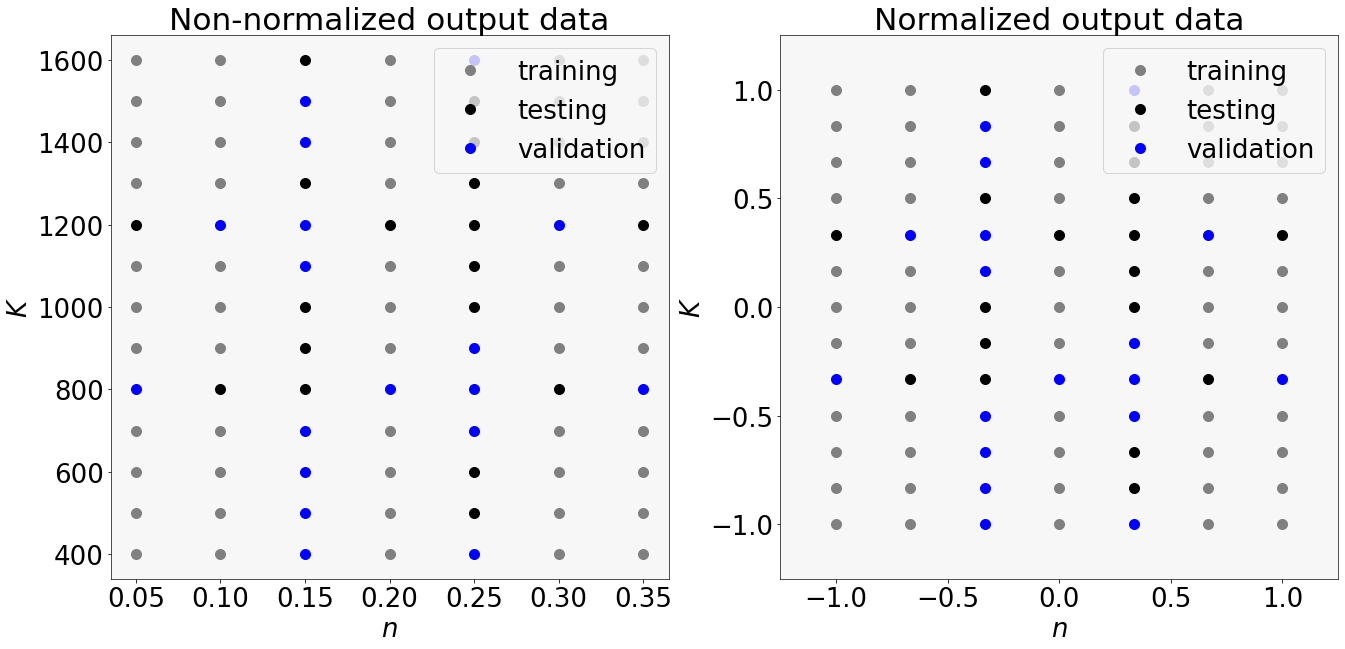

In [8]:
# Plot output dataset with normalized and Non-normalized outputs
#
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)
#
# Non-normalized Data
#
ax1_ANN.plot(Y_train[:,1], Y_train[:,0], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax1_ANN.plot(Y_test[:,1], Y_test[:,0], 'o', markersize=10, color='black', label="testing points") # show Non-normalized testing data
ax1_ANN.plot(Y_val[:,1], Y_val[:,0], 'o', markersize=10, color='blue', label="validation points") # show Non-normalized validation data
ax1_ANN.set_ylabel('$K$')
ax1_ANN.set_xlabel('$n$')
ax1_ANN.set_title('Non-normalized output data')
ax1_ANN.legend(['training', 'testing','validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([200, 1800])
# ax1_ANN.set_xlim([0, 0.4])
#
# Normalized Data
#
ax2_ANN.plot(Y_train_scaled[:,1], Y_train_scaled[:,0], 'o', markersize=10, color='gray', label="training points") # show normalized training data
ax2_ANN.plot(Y_test_scaled[:,1], Y_test_scaled[:,0], 'o', markersize=10, color='black', label="testing points") # show normalized testing data
ax2_ANN.plot(Y_val_scaled[:,1], Y_val_scaled[:,0], 'o', markersize=10, color='blue', label="validation points") # show normalized validation data
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Normalized output data')
ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax2_ANN.set_ylim([-1.25, 1.25])
ax2_ANN.set_xlim([-1.25, 1.25])
#
# Create figure with specified size
fig_ANN.set_size_inches(22, 10)
#

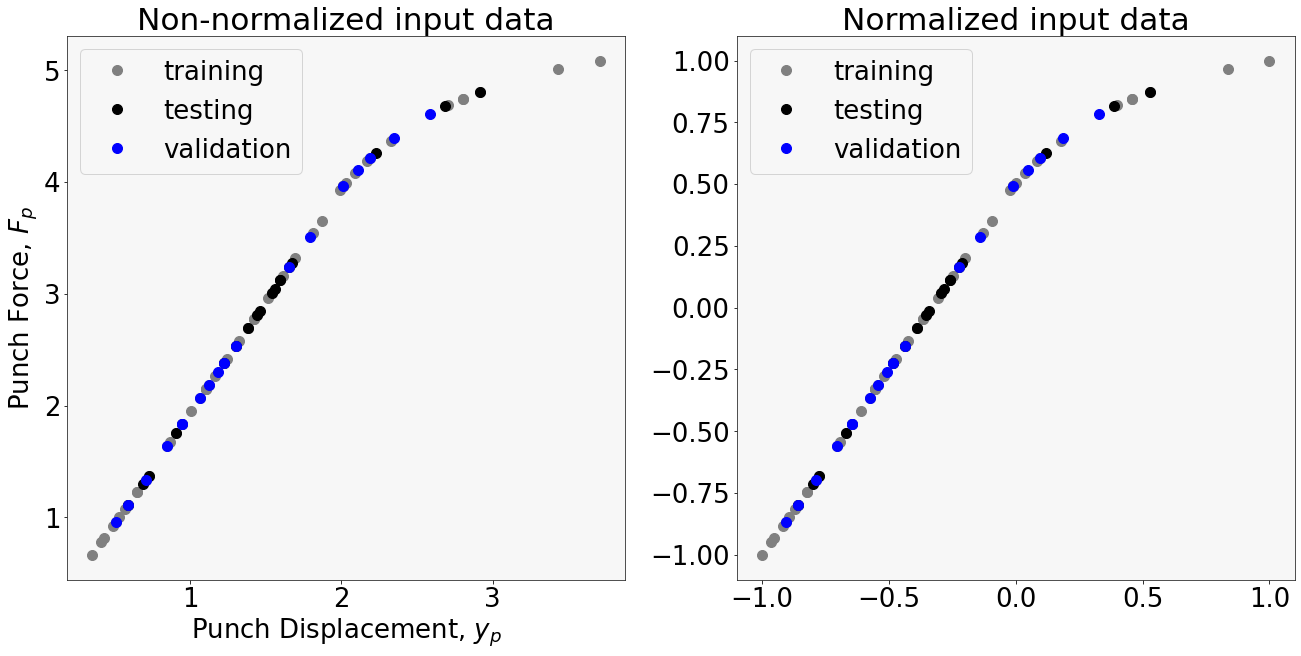

In [9]:
#Plot input dataset with normalized and Non-normalized inputs
#
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)
#
#Select the input variables to plot
#
Var_x = 0 
Var_y = 1
#  
# Non-normalized Data
#
ax1_ANN.plot(X_train[:,Var_x], X_train[:,Var_y], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax1_ANN.plot(X_test[:,Var_x], X_test[:,Var_y], 'o', markersize=10, color='black', label="testing points") # show Non-normalized testing data
ax1_ANN.plot(X_val[:,Var_x], X_val[:,Var_y], 'o', markersize=10, color='blue', label="validation points") # show Non-normalized validation data
ax1_ANN.set_ylabel('Punch Force, $F_p$')
ax1_ANN.set_xlabel('Punch Displacement, $y_p$')
ax1_ANN.set_title('Non-normalized input data')
ax1_ANN.legend(['training', 'testing', 'validation' ], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([200, 1800])
# ax1_ANN.set_xlim([0, 0.4])
#  
# Normalized Data
#
ax2_ANN.plot(X_train_scaled[:,Var_x], X_train_scaled[:,Var_y], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax2_ANN.plot(X_test_scaled[:,Var_x], X_test_scaled[:,Var_y], 'o', markersize=10, color='black', label="testing points") # show Non-normalized training data
ax2_ANN.plot(X_val_scaled[:,Var_x], X_val_scaled[:,Var_y], 'o', markersize=10, color='blue', label="validation points") # show Non-normalized validation data
# ax2_ANN.set_ylabel('$K$')
# ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Normalized input data')
ax2_ANN.legend(['training', 'testing', 'validation'], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([200, 1800])
# ax1_ANN.set_xlim([0, 0.4])
#
# Create figure with specified size
fig_ANN.set_size_inches(22, 10)
#

In [10]:
# Define the initial weights and biases
#
# Layer_1
initial_weights1 = np.array([[0.489527947702890,0.0564416642804923,-0.0491785086894284,-1.09907549569022,-0.764591250332857],
                             [-0.0814420721531516,-0.0273967025909035,0.0655765669755380,0.590150192190876,0.178869422978441],
                             [0.118372106526963,0.197607845761673,-0.0651892216339461,0.104962431027024,0.330132310718870],
                             [-1.35294793675170,0.429419994841425,2.23308286038628,-1.11292189685986,1.04544653722039],
                             [0.841210483186127,-1.04941741253213,-0.0440049000644313,0.174106671098500,0.704040939353769],
                             [0.434433674966714,-0.873111938336544,-1.08582341345772,-0.720506258676749,-1.10911373026638],
                             [-0.110388898304137,0.278233902238233,-1.16555909259892,0.951102132385845,-0.819641408126160]])
initial_bias1 = np.array([-1.8805965664145738447, 1.2027955001514312183, -0.041648672806744960195, -1.9039500006320162484,-1.3198629474411001095])
#
# Layer_2
initial_weights2 = np.array([[-0.780181829696749,1.09650970024416,-0.251421210711151,-1.00277377658740,1.41165968528189],
                             [0.915414335706116,-1.07047990843902,-1.19870147231344,0.161897754816749,-0.507630610373786],
                             [0.593355688760978,-0.703048876945509,-0.858111512324375,1.89148886663719,1.67071778789313],
                             [-1.01945588835915,-0.904527291890759,-0.294177791010899,-1.09817493965959,-1.29589713249617],
                             [-0.946517413700961,-0.426380030552102,-0.749325602814999,-0.409661464713009,1.09890726098174]])
initial_bias2 = np.array([1.9323998990249784402,-1.0380884394997613729,0.23670825030155315249,-1.4367690215895558836,1.7030041905684913939])
#
# Layer_3
initial_weights3 = np.array([[0.801120578324836,-0.570947242060617,-0.642954451205084,0.732089810350565,-0.235658649067294],
                             [-0.619250164594670,1.31363557635830,-0.0659151681058411,-0.927018679840701,-0.968511631801654],
                             [0.352164066209026,-1.75145152198397,-1.08685796824129,0.834011084352530,0.722767616474038],
                             [-1.04881979458398,1.26431869828063,1.38334900238111,1.04222430136325,1.84501352959446],
                             [-0.929935217210399,1.03196109008711,-0.0568035299283248,-0.763233583708551,2.30882641706488]])
initial_bias3 = np.array([-2.24972884633149528,0.64146685391701974144,-0.31031210314394724881,0.97201998472771700133,-1.2841848427009547873])
#
# Layer_4
initial_weights4 = np.array([[-0.606378987662791,0.187695941308350,0.409403387307908,-0.220743767077648,1.51253578271170],
                             [0.873527460311016,-1.24889628382716,0.474331613651811,0.591789103750824,-2.01593089767590],
                             [-0.0280299318304519,-1.38994010506784,-1.15098928104228,-0.650619923057011,0.348450352222393],
                             [1.48998207689300,0.110154511774077,0.167093060512482,-1.66398902740542,-0.400508972139153],
                             [-0.622135819783001,-2.42337562560661,1.49347409191686,-0.336466674619245,-0.550116422368362]])
initial_bias4 = np.array([1.9402600301858898835,-0.41235509091915090174,-0.3680450544527347212,-0.94291121589070181486,1.5751247006970470199])
#
# Layer_5
initial_weights5 = np.array([[0.805955798968581,0.845444723313716],
                             [1.86629040665026,0.192788840145368],
                             [1.24754414183877,-2.65579417585471],
                             [0.144640857211014,0.245936375943917],
                             [1.43625124713754,1.71275295163904]])
initial_bias5 = np.array([-0.26739783265318317618, 0.063268195173918559404])

In [ ]:
print(initial_bias3)
print(initial_bias3.shape
      )

In [ ]:
# Function to create the ANN model
#
def create_ANN(input_dimensions=7, neurons1=5,neurons2=5,neurons3=5,neurons4=5,#neurons5=5,
               activation='tanh',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation,
                    kernel_initializer=lambda shape, dtype: initial_weights1,
                    bias_initializer=lambda shape, dtype: initial_bias1))
    model.add(Dense(neurons2, activation=activation,
                    kernel_initializer=lambda shape, dtype: initial_weights2,
                    bias_initializer= lambda shape, dtype: initial_bias2)) # first hidden layer)) # second hidden layer
    model.add(Dense(neurons3, activation=activation,
                     kernel_initializer=lambda shape, dtype: initial_weights3,
                     bias_initializer=lambda shape, dtype: initial_bias3)) # first hidden layer)) # thrid hidden layer
    model.add(Dense(neurons4, activation=activation,
                    kernel_initializer=lambda shape, dtype: initial_weights4,
                    bias_initializer=lambda shape, dtype: initial_bias4)) # first hidden layer)) # fourth hidden layer, etc.
    model.add(Dense(2, activation='linear',
                     kernel_initializer=lambda shape, dtype: initial_weights5,
                     bias_initializer=lambda shape, dtype: initial_bias5)) # first hidden layer))
    model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
    return model
#
# Do you want to look for the best parameters for the Neural Network using Grid Search ("brute force")?
gridsearch = 1 # If gridsearch = 1 it can be quite slow!
#
if gridsearch==0:
    # If you don't want to use Early Stopping, then comment the command below.
    early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                                   min_delta=0.0, # minimum change in the monitored quantity to qualify as an
                                                  # improvement (if 0, then even small improvements count)
                                   patience=100, # be patient for a few epochs to verify evolution of loss
                                   mode='min') # in min mode, training stops when val_loss stops decreasing
    # Summary of this early_stopping criterion:
    # stop training when there is no improvement in the loss for 30 consecutive epochs.
    #
    # Define the grid search for hyperparameters. Each veriable is a 1D array whose elements represent a particular
    # choice of value for that hyperparameter. The grid search will then create all possible combinations among
    # the hyperparameters values that are defined below. If you do not want to change the value of a particular
    # hyperparameter you can define a 1D array that only has 1 element.
    neurons1 = [5,20,100] # number of neurons in hidden layer 1
    neurons2 = [5,20,100] # number of neurons in hidden layer 2 (if present; uncomment in create_ANN function)
    neurons3 = [5,20,100] # number of neurons in hidden layer 3 (if present; uncomment in create_ANN function)
    neurons4 = [5] # number of neurons in hidden layer 4 (if present; uncomment in create_ANN function)
    neurons5 = [5]
    batch_size = [len(X_train)] # number of samples in each batch
    epochs = [1000] # each element in the vector contains the number of epochs that each model should use.
    optimizer = ['adam'] # 
#   optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] # different optimizers
#   init_mode = ['uniform', 'lecun_uniform', 'normal', 'orthogonal', 'zero', 'one', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] # different weight initialization strategies
    #
    param_grid = dict(batch_size=batch_size, # define the number of samples in each batch
                      epochs=epochs, # total number of epochs
                      neurons1=neurons1, # number of neurons in the first hidden layer
                    #   neurons2=neurons2, # number of neurons in the second hidden layer
                    #   neurons3=neurons3,
                    #   neurons4=neurons4,
                    #   neurons5=neurons5,# commented out because I am not using them
                      optimizer=optimizer) # optimizer to find the model parameters
    ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                               input_dimensions=np.shape(X_train)[1]) # the input dimensions (here it is 2)
    grid = GridSearchCV(estimator=ANN_model, # use our ANN regression model
                        param_grid=param_grid, # use a grid of hyperparameters to find the best among the grid.
                        n_jobs=-1, # number of CPUs to use (if n_jobs = -1 then it uses all CPUs)
                        cv=3) # Using cross validation (if cv=3 then uses 3-fold cross validation)
    grid_result = grid.fit(X_train_scaled, Y_train_scaled, # training data
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_val_scaled, Y_val_scaled)) # validation data to compute loss
    # Once every model in the Grid of hyperparameters is trained, then pick the best model and fit it to
    # the entire training set (without considering cross validation, as we did in the grid search).
    history = grid_result.best_estimator_.fit(X_train_scaled, Y_train_scaled, 
                                              callbacks=[early_stopping],
                                              validation_data=(X_val_scaled,
                                                               Y_val_scaled))
    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_,
                                 grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score'] # mean of the error metric for each Grid point
    stds = grid_result.cv_results_['std_test_score']   # std of the error metric for each Grid point
    params = grid_result.cv_results_['params'] # hyperparameters used in each Grid point
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param)) # print all the hyperparameters used in each Grid point
else: # just use a particular Neural Network of choice
    # If you don't want to use Early Stopping, then comment the command below.
    early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                                   min_delta=0.0, # minimum change in the monitored quantity to qualify as an
                                                  # improvement (if 0, then even small improvements count)
                                   patience=500, # be patient for a few epochs to verify evolution of loss
                                   mode='min') # in min mode, training stops when val_loss stops decreasing
    # Summary of this early_stopping criterion:
    # stop training when there is no improvement in the loss for 30 consecutive epochs.
#
    neurons1 = 5 # number of neurons in hidden layer 1
    neurons2 = 5  # number of neurons in hidden layer 2
    neurons3 = 5  # number of neurons in hidden layer 3
    neurons4 = 5  # number of neurons in hidden layer 4  
    #neurons5 = 5  # number of neurons in hidden layer 5
    epochs = 1000 # number of epochs
    batch_size = len(X_train) # number of samples in each batch
    optimizer = Adam(learning_rate=0.0001)
    ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                               input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                               neurons1=neurons1, # number of neurons in the first hidden layer
                               neurons2=neurons2, # number of neurons in the second hidden layer~
                               neurons3=neurons3, # number of neurons in the first hidden layer
                               neurons4=neurons4, # number of neurons in the second hidden layer
                               #neurons5=neurons5, # number of neurons in the first hidden layer
                               batch_size=batch_size, # define the number of samples in each batch
                               epochs=epochs, # number of epochs
                               optimizer=optimizer, # optimizer
                               callbacks=[early_stopping], # include early stopping
                               validation_data=(X_val_scaled, Y_val_scaled)) # validation data to compute loss
    # Train the model:
    history = ANN_model.fit(X_train_scaled, Y_train_scaled)    

Epoch 1/1000


<ipython-input-19-208df31b276b>:102: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN


1/1 [==============================] - 1s 1s/step - loss: 4.8861e-04 - accuracy: 0.9636 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0393 - accuracy: 0.9818 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0016 - accuracy: 0.9818 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0252 - accuracy: 0.9818 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0097 - accuracy: 0.9636 - val_loss: 6.9200e-04 - val_accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 53ms/step - loss: 5.3188e-04 - accuracy: 0.9636 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 8/1000
1/1

In [ ]:
#Ouput data
Y_data_ANNpred_scaled = ANN_model.model.predict(X_data_scaled)
Y_data_ANNpred = scaler_y.inverse_transform(Y_data_ANNpred_scaled) 

3/3 [==============================] - 0s 4ms/step


In [ ]:
ANN_model.model.save('my_model.h5')

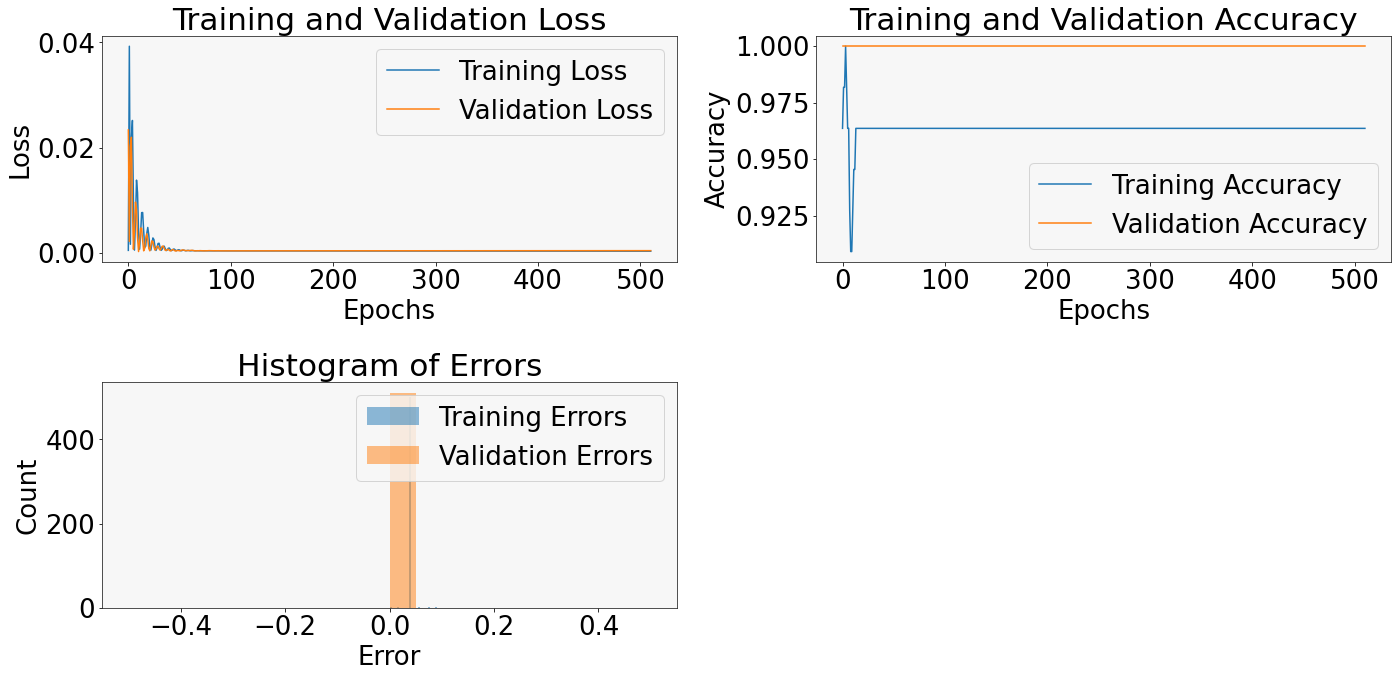

In [ ]:
# create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]

# plot the training and validation loss on the first subplot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# plot the training and validation accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# plot a histogram of the errors on a third subplot
errors = [1-acc for acc in history.history['accuracy']]
val_errors = [1-acc for acc in history.history['val_accuracy']]
ax3.hist(errors, bins=20, alpha=0.5, label='Training Errors')
ax3.hist(val_errors, bins=20, alpha=0.5, label='Validation Errors')
ax3.set_xlabel('Error')
ax3.set_ylabel('Count')
ax3.set_title('Histogram of Errors')
ax3.legend()

# remove the unused subplot
fig.delaxes(axes[1, 1])

# adjust the layout and display the figure
fig.tight_layout()
plt.show()

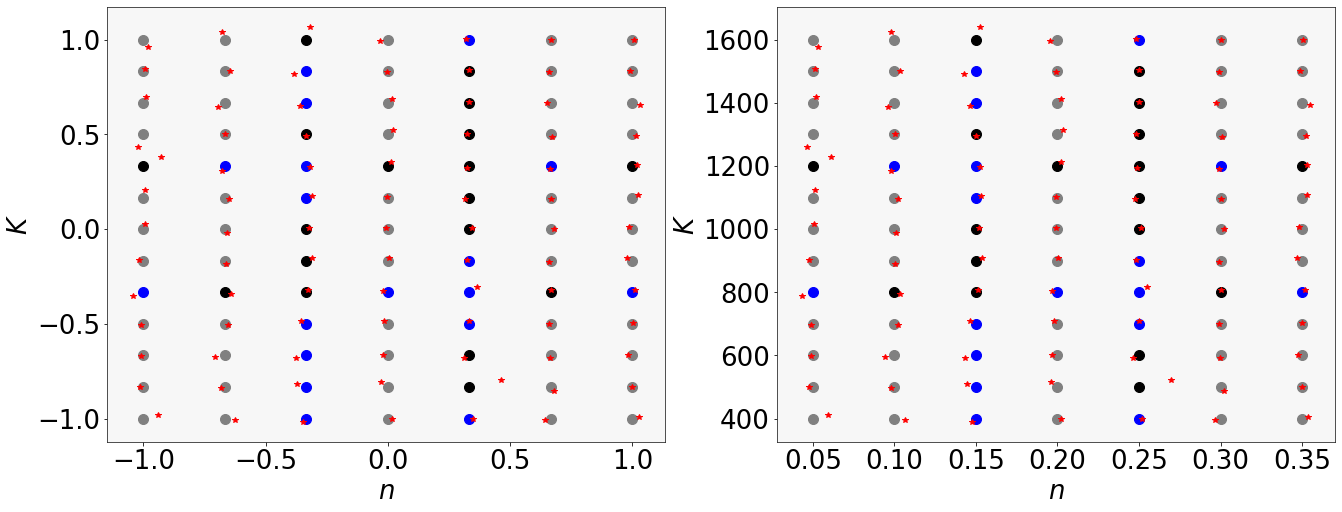

In [ ]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

ax1_ANN.plot(Y_train_scaled[:,1], Y_train_scaled[:,0], 'o', markersize=10, color='gray', label="training points") # show training data
ax1_ANN.plot(Y_test_scaled[:,1], Y_test_scaled[:,0], 'o', markersize=10, color='black', label="testing points") # show training data
ax1_ANN.plot(Y_val_scaled[:,1], Y_val_scaled[:,0], 'o', markersize=10, color='blue', label="testing points") # show validation data
ax1_ANN.plot(Y_data_ANNpred_scaled[:,1], Y_data_ANNpred_scaled[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax1_ANN.set_ylabel('$K$')
ax1_ANN.set_xlabel('$n$')

ax2_ANN.plot(Y_train[:,1], Y_train[:,0], 'o', markersize=10, color='gray', label="training points") # show training data
ax2_ANN.plot(Y_test[:,1], Y_test[:,0], 'o', markersize=10, color='black', label="testing points") # show training data
ax2_ANN.plot(Y_val[:,1], Y_val[:,0], 'o', markersize=10, color='blue', label="testing points") # show validation data
ax2_ANN.plot(Y_data_ANNpred[:,1], Y_data_ANNpred[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
# ax2_ANN.legend(loc='best')
# ax2_ANN.set_xlim([0, 0.4])
# ax2_ANN.set_ylim([200, 1800])
#ax2_ANN.grid(True, color='gray', linestyle='-')
# Create figure with specified size
fig_ANN.set_size_inches(22, 8)


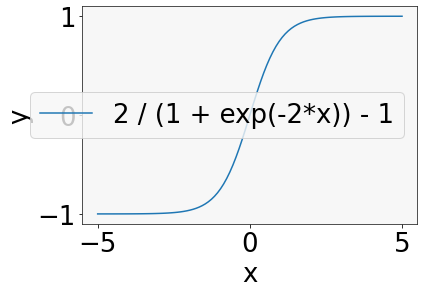

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-5, 5, 100)

# Compute the values of the functions
y1 = np.tanh(x)
y2 = 2 / (1 + np.exp(-2*x)) - 1

# Plot the functions
# plt.plot(x, y1, label='tanh(x)')
plt.plot(x, y2, label='2 / (1 + exp(-2*x)) - 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [ ]:
score = ANN_model.score(X_test_scaled, Y_test_scaled)
print("Test Score: %.2f MSE" % score)

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super

In [ ]:
# As expected, the code for multidimensional ANNs is basically the same as the 1D case.
from tensorflow import keras
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from tensorflow.keras import activations # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
from sklearn.metrics import r2_score # Import error metrics
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
#
# Function to create the ANN model
def create_ANN(input_dimensions=1,neurons1=5,neurons2=5,neurons3=5,neurons4=5,neurons5=5,
                 activation=activations.tanh,optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(neurons3, activation=activation)) # UNCOMMEND If you want a third hidden layer
    model.add(Dense(neurons4, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(neurons5, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(2, activation = 'linear')) # output layer with just 2 neuronS
    model.compile(loss='mse', optimizer=optimizer ) # choose error metric and optimizer.
    return model

In [ ]:
# If you don't want to use Early Stopping, then comment the command below.
early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                               min_delta=0, # minimum change in the monitored quantity to qualify as an
                                              # improvement (if 0, then even small improvements count)
                               patience=100, # be patient for a few epochs to verify evolution of loss
                               mode='min'
                               ) # in min mode, training stops when val_loss stops decreasing
# Summary of this early_stopping criterion:
# stop training when there is no improvement in the loss for 30 consecutive epochs.

neurons1=5 # number of neurons in hidden layer 1
neurons2=5 # number of neurons in hidden layer 2
neurons3=5 # number of neurons in hidden layer 3
neurons4=5 # number of neurons in hidden layer 4
neurons5=5 # number of neurons in hidden layer 5
epochs = 1000 # number of epochs
batch_size = len(X_train) # number of samples in each batch
#optimizer= SGD(lr=0.01, momentum=0.9)
#optimizer = Adagrad(lr=0.01, epsilon=None, decay=0.0)
optimizer = Adam(learning_rate=0.001)
                 
                 #, epsilon=None, decay=0.0, amsgrad=False)

ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                           input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                           neurons1=neurons1, # number of neurons in the first hidden layer
                           neurons2=neurons2, # number of neurons in the second hidden layer
                           neurons3=neurons3, # number of neurons in the third hidden layer
                           neurons4=neurons4, # number of neurons in the fourth hidden layer
                           neurons5=neurons5, # number of neurons in the fifth hidden layer
                           batch_size=batch_size, # define the number of samples in each batch
                           epochs=epochs, # number of epochs
                           optimizer=optimizer, # optimizer
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_val_scaled, Y_val_scaled)) # validation data to compute loss
# Train the model:
history = ANN_model.fit(X_train_scaled, Y_train_scaled, verbose=1)

In [ ]:
# Get the weights and biases for the first layer
print(history.
      )


In [ ]:
# Modify the weights and bias manually
# Layer_1
new_weights1 = np.array([[0.48952794770288993176, -0.081442072153151565117, 0.11837210652696303348, -1.3529479367517012189, 0.84121048318612734462],
                 [0.056441664280492319372, -0.027396702590903512092, 0.19760784576167317317, 0.42941999484142506782, -1.0494174125321316104],
                 [-0.049178508689428392098, 0.065576566975538014281, -0.065189221633946109469, 2.2330828603862844517, -0.044004900064431251572],
                 [-1.0990754956902197836, 0.590150192190875722, 0.10496243102702444705, -1.1129218968598593165, 0.17410667109849986556],
                 [-0.76459125033285679773, 0.17886942297844099503, 0.33013231071887016999, 1.0454465372203909368, 0.70404093935376932389],
                 [0.43443367496671420058, -0.87311193833654421326, 0.2782339022382329663, -1.0858234134577240404, -1.1655590925989187667],
                 [-0.11038889830413665949, 0.2782339022382329663, -1.1655590925989187667, 0.95110213238584484507, -0.81964140812616037568]])
new_bias1 = np.array([-1.8805965664145738447,1.2027955001514312183,-0.041648672806744960195,-1.9039500006320162484,-1.3198629474411001095])
ANN_model.model.layers[0].set_weights([new_weights1, new_bias1])
#
# Layer_2
new_weights2 = [-0.7801818296967485411, 0.91541433570611641102, 0.59335568876097821711, -1.0194558883591453569, -0.94651741370096065253,
        1.0965097002441632767, -1.0704799084390241859, -0.7030488769455085496, -0.9045272918907587556, -0.42638003055210166314,
        -0.25142121071115064446, -1.1987014723134352678, -0.85811151232437510306, -0.29417779101089924776, -0.74932560281499871468,
        -1.002773776587401855, 0.16189775481674884006, 1.8914888666371902914, -1.0981749396595921198, -0.4096614647130086273,
        1.4116596852818865671, -0.50763061037378587326, 1.6707177878931280812, -1.2958971324961734428, 1.0989072609817427395]

new_weights2 = np.array(new_weights2).reshape((5, 5))
new_bias2 = np.array([1.9323998990249784402,-1.0380884394997613729,0.23670825030155315249,-1.4367690215895558836,1.7030041905684913939])
ANN_model.model.layers[1].set_weights([new_weights2, new_bias2])
#
# Layer_3
new_weights3 = [[0.8011205783248364, -0.6192501645946703, 0.3521640662090256, -1.0488197945839783, -0.9299352172103988],
        [-0.570947242060617, 1.3136355763583016, -1.7514515219839675, 1.264318698280632, 1.0319610900871079],
        [-0.6429544512050838, -0.0659151681058411, -1.0868579682412918, 1.3833490023811113, -0.056803529928324784],
        [0.7320898103505651, -0.9270186798407009, 0.8340110843525295, 1.0422243013632531, -0.7632335837085507],
        [-0.23565864906729364, -0.9685116318016537, 0.7227676164740378, 1.8450135295944557, 2.3088264170648807]]
new_weights3 = np.array(new_weights3).reshape((5, 5))
new_bias3 = np.array([-2.24972884633149528,0.64146685391701974144,-0.31031210314394724881,0.97201998472771700133,-1.2841848427009547873])
ANN_model.model.layers[2].set_weights([new_weights3, new_bias3])
#
# Layer_4
new_weights4 = np.array([[-0.60637898766279063612, 0.87352746031101624613, -0.028029931830451892266, 1.4899820768930025494, -0.62213581978300047659],
                [0.18769594130835043355, -1.2488962838271602251, -1.3899401050678423797, 0.11015451177407710459, -2.4233756256066074641],
                [0.40940338730790781785, 0.47433161365181103486, -1.1509892810422790443, 0.16709306051248168368, 1.4934740919168574269],
                [-0.22074376707764847838, 0.59178910375082349749, -0.65061992305701132899, -1.6639890274054240926, -0.33646667461924484321],
                [1.5125357827117000831, -2.0159308976758967269, 0.34845035222239267858, -0.40050897213915298556, -0.55011642236836244546]])
new_weights4 = np.array(new_weights4).reshape((5, 5))
new_bias4 = np.array([1.9402600301858898835,-0.41235509091915090174,-0.3680450544527347212,-0.94291121589070181486,1.5751247006970470199])
ANN_model.model.layers[3].set_weights([new_weights4, new_bias4])
#
# Layer_5
new_weights5 = np.array([[0.80595579896858049462, 1.8662904066502601363],
                [1.2475441418387678283, 0.14464085721101416215],
                [1.4362512471375441514, 0.84544472331371600671],
                [0.19278884014536798452, -2.6557941758547110034],
                [0.24593637594391654089, 1.7127529516390425091]])
new_bias5 = np.array([-0.26739783265318317618,0.063268195173918559404])
ANN_model.model.layers[4].set_weights([new_weights5, new_bias5])

In [ ]:
# Get the current weights and bias of the model
# Layer_1
weights1 = ANN_model.model.layers[0].get_weights()[0]
bias1 = ANN_model.model.layers[0].get_weights()[1]
# Layer_2
weights2 = ANN_model.model.layers[1].get_weights()[0]
bias2 = ANN_model.model.layers[1].get_weights()[1]
# Layer_3
weights3 = ANN_model.model.layers[2].get_weights()[0]
bias3 = ANN_model.model.layers[2].get_weights()[1]
# Layer_4
weights4 = ANN_model.model.layers[3].get_weights()[0]
bias4 = ANN_model.model.layers[3].get_weights()[1]
# Layer_5
weights5 = ANN_model.model.layers[4].get_weights()[0]
bias5 = ANN_model.model.layers[4].get_weights()[1]


Layer2Print = 3
print("Layer", Layer2Print, "weights:", weights1)
print("Layer", Layer2Print, "bias:", bias3)